# Progetto di predizione tramite regressione (variabili continue)

# Houseprice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Extraction

In [2]:
df = pd.read_csv("train.csv")
df    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2. Data Cleaning, EDA e Feature Selection

### Analisi e selezione delle variabili più importanti

In [5]:
# valori nulli
pd.set_option("display.max_rows", None)
df.isnull().sum(axis=0).sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [6]:
df.drop(["Id", "PoolQC", "MiscFeature", "Alley", "Fence"], axis=1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
df.duplicated() == True

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [8]:
df.duplicated().sum()

0

### Correlazione

In [9]:
#per variabili continue
matrice_correlata = df.corr().style.background_gradient(cmap="coolwarm")
matrice_correlata


/var/folders/9c/vj_5mct12p530mzfrk667tww0000gn/T/ipykernel_1296/2913769770.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlata = df.corr().style.background_gradient(cmap="coolwarm")


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [10]:
df = df.drop(["MSSubClass","OverallCond", "BsmtFinSF2", "LowQualFinSF", "LotArea", "BsmtUnfSF","LowQualFinSF", "BsmtHalfBath", "HalfBath", "KitchenAbvGr", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"], axis=1)

In [11]:
df.corr().style.background_gradient(cmap="coolwarm")

/var/folders/9c/vj_5mct12p530mzfrk667tww0000gn/T/ipykernel_1296/1464306230.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap="coolwarm")


,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
Id,1.000000,-0.010601,-0.028365,-0.012713,-0.021998,-0.050298,-0.005024,-0.015415,0.010496,0.005590,0.008273,0.002289,0.005587,0.037719,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.021917
LotFrontage,-0.010601,1.000000,0.251646,0.123349,0.088866,0.193458,0.233633,0.392075,0.457181,0.080177,0.402797,0.100949,0.198769,0.263170,0.352096,0.266639,0.070250,0.285691,0.344997,0.351799
OverallQual,-0.028365,0.251646,1.000000,0.572323,0.550684,0.411876,0.239666,0.537808,0.476224,0.295493,0.593007,0.111098,0.550600,0.101676,0.427452,0.396765,0.547766,0.600671,0.562022,0.790982
YearBuilt,-0.012713,0.123349,0.572323,1.000000,0.592855,0.315707,0.249503,0.391452,0.281986,0.010308,0.199010,0.187599,0.468271,-0.070651,0.095589,0.147716,0.825667,0.537850,0.478954,0.522897
YearRemodAdd,-0.021998,0.088866,0.550684,0.592855,1.000000,0.179618,0.128451,0.291066,0.240379,0.140024,0.287389,0.119470,0.439046,-0.040581,0.191740,0.112581,0.642277,0.420622,0.371600,0.507101
MasVnrArea,-0.050298,0.193458,0.411876,0.315707,0.179618,1.000000,0.264736,0.363936,0.344501,0.174561,0.390857,0.085310,0.276833,0.102821,0.280682,0.249070,0.252691,0.364204,0.373066,0.477493
BsmtFinSF1,-0.005024,0.233633,0.239666,0.249503,0.128451,0.264736,1.000000,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,-0.107355,0.044316,0.260011,0.153484,0.224054,0.296970,0.386420
TotalBsmtSF,-0.015415,0.392075,0.537808,0.391452,0.291066,0.363936,0.522396,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,0.050450,0.285573,0.339519,0.322445,0.434585,0.486665,0.613581
1stFlrSF,0.010496,0.457181,0.476224,0.281986,0.240379,0.344501,0.445863,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,0.127401,0.409516,0.410531,0.233449,0.439317,0.489782,0.605852
2ndFlrSF,0.005590,0.080177,0.295493,0.010308,0.140024,0.174561,-0.137079,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.502901,0.616423,0.194561,0.070832,0.183926,0.138347,0.319334


## EDA

In [12]:
df["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

Text(0.5, 1.0, 'Violinplot di SalePrice per SaleCondition')

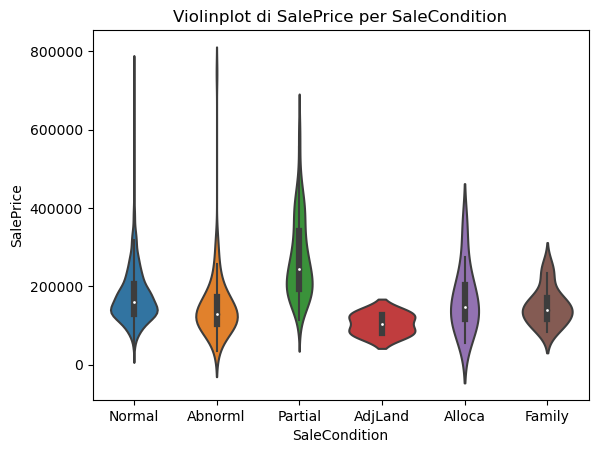

In [13]:
#relazione tra categoriale e continua
#boxplot o violinplot

sns.violinplot(x = df["SaleCondition"], y = df["SalePrice"])
plt.title("Violinplot di SalePrice per SaleCondition")

Text(0.5, 1.0, 'Violinplot di SalePrice per SaleCondition')

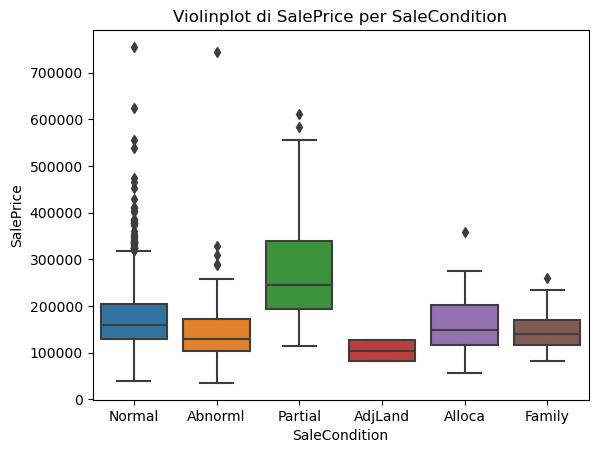

In [14]:
sns.boxplot(x = df["SaleCondition"], y = df["SalePrice"])
plt.title("Violinplot di SalePrice per SaleCondition")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   Street         1460 non-null   object 
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [16]:
colonne_categoriali = df.select_dtypes(include=['object'])
colonne_categoriali.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
colonne_continue = df.select_dtypes(include=['int64'])
colonne_continue.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [18]:
df2 = df[["OverallQual", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "MSZoning", "Street", "HouseStyle", "LotShape", "KitchenQual", "SalePrice"]]
df2

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,MSZoning,Street,HouseStyle,LotShape,KitchenQual,SalePrice
0,7,2003,2003,706,856,856,RL,Pave,2Story,Reg,Gd,208500
1,6,1976,1976,978,1262,1262,RL,Pave,1Story,Reg,TA,181500
2,7,2001,2002,486,920,920,RL,Pave,2Story,IR1,Gd,223500
3,7,1915,1970,216,756,961,RL,Pave,2Story,IR1,Gd,140000
4,8,2000,2000,655,1145,1145,RL,Pave,2Story,IR1,Gd,250000
5,5,1993,1995,732,796,796,RL,Pave,1.5Fin,IR1,TA,143000
6,8,2004,2005,1369,1686,1694,RL,Pave,1Story,Reg,Gd,307000
7,7,1973,1973,859,1107,1107,RL,Pave,2Story,IR1,TA,200000
8,7,1931,1950,0,952,1022,RM,Pave,1.5Fin,Reg,TA,129900
9,5,1939,1950,851,991,1077,RL,Pave,1.5Unf,Reg,TA,118000


In [19]:
df["KitchenQual"].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [20]:
categoriche = df2.select_dtypes(include=["object"])
categoriche.columns

Index(['MSZoning', 'Street', 'HouseStyle', 'LotShape', 'KitchenQual'], dtype='object')

## 3. Data Modelling 
### Supervised Learning (Multiple Linear Regression, Random Forest, XGBoost, SVR) - algoritmi di ML
#### Tecnica per trovare i migliori iperparametri: Grid Search CV, Cross Val Score

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
#regresione lineare multipla
#non accetta variabili categoriche

encodedDF = pd.get_dummies(df2,columns=['MSZoning', 'Street', 'HouseStyle', 'LotShape', 'KitchenQual'])
X = encodedDF.drop("SalePrice",axis=1)
y = encodedDF["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

In [23]:
reg.score(X_train,y_train)

0.7699425167421794

In [24]:
#predice i valori potenziali di y test
y_pred = reg.predict(X_test)
y_pred

array([155793.40059521, 290511.67806517,  86914.69749844, 142332.38702167,
       334012.06896843,  56518.25097552, 216015.65198757, 168612.10474637,
        55364.5211602 , 131760.36457553, 159694.38329354, 112967.90231925,
        30816.1949796 , 221446.764499  , 177550.24792354, 141400.99172774,
       213751.40725204, 136475.71491495, 105706.84056394, 235931.52334908,
       167860.70968906, 219484.64997954, 181861.79527766, 117186.70761691,
       223171.43794578, 172152.55812515, 211013.58261746,  77438.84915218,
       183767.63292345, 197684.49426643, 134498.98163949, 231092.65634544,
       246237.86832755,  95383.88295051, 250616.58885597, 155953.67291223,
       148477.04596521, 205505.33396384, 280400.69492992,  82022.58169857,
       121105.60226272, 247105.14180185, 125641.77334302, 312529.39571385,
       131503.86776271, 148794.46850776, 118637.64918319, 121811.41055855,
       402991.03149327, 133111.57865434, 112922.87659985, 220053.06183512,
       110449.88318047, 3

In [25]:
#MeanSquaredError viene utilizzata per vedere differenza tra due insiemi di valori. Si utilizza spesso in problemi di regressione

from sklearn import metrics

In [26]:
#indica errore prezzo, e quadra il prezzo per questo valore alto
#viene calcolata la media delle differenze al quadrato dei valori pred e osservati
MSE = metrics.mean_squared_error(y_test,y_pred)
MSE

1491345681.1028876

In [27]:
#indica errore prezzo, e quadra il prezzo per questo valore alto
#viene calcolata la media delle differenze al quadrato dei valori pred e osservati
#applico radice quadrata
RMSE = metrics.mean_squared_error(y_test,y_pred, squared=False)
RMSE

38617.94506577075

In [28]:
#variazione di 38k euro tra valori previsti e osservati
np.sqrt(MSE)

38617.94506577075

In [29]:
# con valori vicino a 1 c'è molta variazione, qindi il sale price è ben spiegato dalle variabili indipendenti 
# il modello spiega all' 80 % i risultati ottenuti
# spiega la variazione della variabile dipendente
# la variabile prezzo è spiegata all' 80 % dalle variabili indipendenti
R_squared = metrics.r2_score(y_test, y_pred)
R_squared

0.8055694580883026

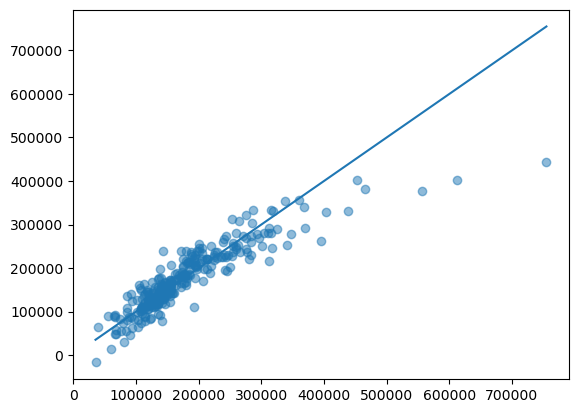

In [30]:
#scatter plot per vedere differenza tra valori attuali e predetti

plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)])
plt.show()

In [31]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [32]:
rf = RandomForestRegressor(max_depth=None, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(rf.predict(X_test))

[147587.5        304188.38       113727.5        127180.5
 315506.09        88836.         187375.63       153553.
  87761.5        116831.97       158037.5        123646.65
  78152.         214497.43       176080.         137169.5
 200299.         145909.5        112458.         215296.82
 150058.         209783.95       172220.51       129828.75
 193794.7        175959.         196164.12333333 101018.5
 178371.         198652.32       124288.87       237414.06
 162450.64       108205.83       249567.5        152478.5
 146737.51       200568.         287790.5        102924.
 125873.         237490.         124866.         353394.11
 131244.         148391.         117231.49       127710.5
 461539.35       131166.16       132240.49       199697.
 118544.56       301589.87       141215.36666667 251442.78
 185198.         154097.75       149003.5        116035.
  61724.         148011.75       287124.67       307732.2
 260524.35       198032.2        119801.5        310306.29
 127397.75 

In [33]:
#più è basso più è migliore
RMSE = metrics.mean_squared_error(y_test,y_pred_rf, squared=False)
RMSE

31872.072785558765

In [34]:
R_squared = metrics.r2_score(y_test, y_pred_rf)
R_squared

0.86756377809641

In [35]:
#controllo di numero ottimale di alberi
RMSE = []

for i in range(10,110,5):
    rf = RandomForestRegressor(n_estimators = i ,max_depth=None, random_state=42)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    RMSE.append(metrics.mean_squared_error(y_test,y_pred_rf, squared=False))

In [36]:
RMSE

[32870.73511024456,
 33223.87536061733,
 32931.305079248275,
 33807.71000953749,
 33270.31258202094,
 33437.673807889325,
 32631.206763960978,
 32590.145138317363,
 32748.444970804572,
 32467.43989311045,
 32539.259124099994,
 32675.793717008073,
 32526.09228783611,
 32336.501471434014,
 32473.772500720424,
 32196.73145395773,
 32019.417836495497,
 31905.923190711568,
 31872.072785558765,
 31909.86669217081]

In [37]:
#per trovare l' RMSE minimo

minimo = float("inf")
for i in RMSE:
    if i < minimo: minimo=i

minimo

31872.072785558765

In [38]:
#per trovare l' albero ideale
lista = list(range(10,110,5))

albero_ottimale = lista[RMSE.index(min(RMSE))]
albero_ottimale

100

In [39]:
#adesso si ricalcola l' RMSE con il valore di albero ottimale trovato 
rf = RandomForestRegressor(n_estimators = 100, max_depth=None, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(rf.predict(X_test))

[147587.5        304188.38       113727.5        127180.5
 315506.09        88836.         187375.63       153553.
  87761.5        116831.97       158037.5        123646.65
  78152.         214497.43       176080.         137169.5
 200299.         145909.5        112458.         215296.82
 150058.         209783.95       172220.51       129828.75
 193794.7        175959.         196164.12333333 101018.5
 178371.         198652.32       124288.87       237414.06
 162450.64       108205.83       249567.5        152478.5
 146737.51       200568.         287790.5        102924.
 125873.         237490.         124866.         353394.11
 131244.         148391.         117231.49       127710.5
 461539.35       131166.16       132240.49       199697.
 118544.56       301589.87       141215.36666667 251442.78
 185198.         154097.75       149003.5        116035.
  61724.         148011.75       287124.67       307732.2
 260524.35       198032.2        119801.5        310306.29
 127397.75 

In [40]:
#più è basso più è migliore
RMSE = metrics.mean_squared_error(y_test,y_pred_rf, squared=False)
RMSE

31872.072785558765

In [41]:
#CV (cross validation)
#trova numero ottimale di parametri facendo un grid search utilizzando la cv
#la cv serve per prevenire l' overfitting del modello
#overfitting si vede se accuracy è alta nel train e bassa sul test
# la cv fa valutazioni su più split train e test

from sklearn.model_selection import cross_val_score


In [42]:
#in questo caso lo score è il neg_mean_squared_error e quindi più basso è meglio è
#devo calcolare il val assoluto della media dei rmse di ogni ciclo (ogni ciclo calcola 5 volte lo score)
MSE = []

for i in range(10,110,5):
    rf = RandomForestRegressor(n_estimators = i ,max_depth=None, random_state=42)
    score = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
    MSE.append(np.mean(abs(score)))
    #rf.fit(X_train,y_train)
    #y_pred_rf = rf.predict(X_test)
    #RMSE.append(metrics.mean_squared_error(y_test,y_pred_rf, squared=False))
MSE

[1302326353.888741,
 1328665677.9554029,
 1254548344.3903863,
 1246254075.414209,
 1232839731.5712895,
 1236667659.1325688,
 1248744928.7045054,
 1248367055.123178,
 1242960061.3935297,
 1240869361.3295696,
 1250875377.0687788,
 1245305530.2408555,
 1241602574.8636034,
 1239906595.9161077,
 1235752540.245348,
 1225789268.5507836,
 1225812390.4238229,
 1214072637.0066562,
 1207163149.2338078,
 1206232031.189103]

In [43]:
#list comprehension 
rmse = [np.sqrt(i) for i in MSE]
rmse

#vedere GRID SEARCH CV

[36087.75905883795,
 36450.86662831767,
 35419.60395586583,
 35302.323937868576,
 35111.817548672836,
 35166.28583078641,
 35337.58521326132,
 35332.23818445667,
 35255.63871770769,
 35225.97566185456,
 35367.71659393321,
 35288.88678098043,
 35236.38140989513,
 35212.307449471526,
 35153.27211292496,
 35011.27344943031,
 35011.60365398625,
 34843.54512684747,
 34744.253470664866,
 34730.851287999016]

In [44]:
min(rmse)

34730.851287999016

In [45]:
#per trovare l' albero ideale
lista = list(range(10,110,5))

albero_ottimale = lista[rmse.index(min(rmse))]
albero_ottimale

105

In [46]:
# grid search cv, crea una griglia con dei parametri come numero di alberi e altri che poi sono testati, per decidere i migliori parametri
#iperparametri che servono per fare delle modifiche sul settaggio dell' algoritmo (es. numero di alberi nel random forest)
#per saper dire qual è il miglior parametro

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV



In [47]:
parameters = {"n_estimators":[100, 105, 110], "max_depth": [None, 30]}
random_forest = RandomForestRegressor()
classificatore = GridSearchCV(random_forest, parameters, scoring = 'neg_mean_squared_error')
classificatore.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 30],
                         'n_estimators': [100, 105, 110]},
             scoring='neg_mean_squared_error')

In [48]:
best_estimator = classificatore.best_estimator_
best_estimator

RandomForestRegressor(max_depth=30, n_estimators=110)

In [49]:
best_params = classificatore.best_params_
best_params

{'max_depth': 30, 'n_estimators': 110}

In [50]:
#prezzi case predetti attraverso il Random Forest con i parametri migliori
y_pred = best_estimator.predict(X_test)
y_pred

array([150675.        , 300660.90909091, 113219.54545455, 126582.72727273,
       312396.57272727,  85530.90909091, 187860.81818182, 152338.18181818,
        83447.27272727, 121671.54545455, 158730.45454545, 122910.42727273,
        87862.72727273, 210148.54545455, 177436.36363636, 138841.13636364,
       197840.90909091, 149637.27272727, 113701.81818182, 213298.65454545,
       147110.54545455, 211234.95454545, 170988.43636364, 129653.18181818,
       190909.68181818, 175040.58181818, 195122.66060606, 100605.        ,
       176979.54545455, 195535.52424242, 128189.28181818, 241878.90909091,
       167455.27272727, 110408.63636364, 246102.01818182, 153503.18181818,
       146792.98181818, 204799.54545455, 283319.72727273, 105777.72727273,
       123391.81818182, 237339.26363636, 125214.63636364, 361348.80909091,
       131420.90909091, 151875.45454545, 118593.63636364, 128591.45454545,
       473372.23636364, 137029.84545455, 134682.41818182, 196987.23636364,
       109879.09090909, 3

In [51]:
#minore è meglio è
#differenza di prezzo tra attuali e predetti
RMSE = metrics.mean_squared_error(y_test,y_pred, squared=False)
RMSE


32390.79686753779

In [52]:
#knn 
#punto di partenza, si fa una previsione tra quel punto e tutti gli altri punti dei dati di addestramento
#si usa la distanza euclidea 
#si prendono le k osservazioni più vicine



### XGBoost


In [53]:
import xgboost as xgb

In [54]:
#xgboost anche per variabili categoriche
#learning_rate quanto apprende in base alla funzione di perdita (qui 0.1 è già veloce)
#un algoritmo va aggiornando i suoi pesi che si vanno a moltiplicare con le variabili
#i pesi sono dei moltiplicatori per gli input, per minimizzare la funzione di loss
#discesa del gradiente è un metodo per ridurre la funzione di perdita, si muove in direzione opposta per aggiornarei i pesi

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective="reg:squarederror")
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
y_pred = xgb_model.predict(X_test)
y_pred

array([148135.08 , 324485.47 , 104724.06 , 124049.31 , 330162.16 ,
        90578.84 , 183751.31 , 162139.38 ,  91186.8  , 126353.56 ,
       154245.39 , 125082.02 ,  81265.42 , 211992.16 , 177239.06 ,
       135348.4  , 198137.7  , 146102.9  , 106666.38 , 220108.64 ,
       160021.47 , 233798.84 , 173381.2  , 117265.164, 194653.44 ,
       164857.78 , 202686.3  ,  90294.02 , 182656.83 , 201394.61 ,
       130606.53 , 227541.36 , 216036.58 , 102862.13 , 245519.22 ,
       145745.77 , 170005.45 , 199497.83 , 303455.44 , 100885.92 ,
       121282.695, 243994.25 , 127512.27 , 363249.1  , 127742.84 ,
       132484.36 , 124149.54 , 127872.766, 504736.78 , 130298.42 ,
       121744.71 , 201259.14 , 110344.086, 313192.9  , 141827.17 ,
       268699.56 , 193755.66 , 156027.08 , 152928.64 , 114112.43 ,
        53500.914, 146290.19 , 289423.78 , 327381.53 , 259758.66 ,
       214171.66 , 117654.37 , 314499.97 , 123802.77 , 165237.02 ,
       121300.26 , 131708.11 , 103331.71 ,  87914.555, 238481.

In [56]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
rmse

37707.70114248234

## SVR (Support Vector Regression)

In [57]:
# epsilon insensitivity: si decide un valore di epsilon che conterrà quel range di valori accettabili per l' algoritmo così che gli errori di previsione della soglia epsilon verranno accettati

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


In [58]:
svr = SVR()
param_grid = {"kernel": ["linear", "poly", "rbf", "sigmoid"], "C":[0.1, 1, 10], "epsilon": [0.05, 0.1, 0.2]}
grid_search = GridSearchCV(svr,param_grid, cv=3) #cv ossia quante volte deve fare la cross validation
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.05, 0.1, 0.2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [59]:
grid_search.best_params_

{'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}

In [60]:
#la regolarizzazione è una tecnica di ML per ridurre l' overfitting
# il kernel una zunizone di trasformazione che trasforma i dati da uno spazio originale in uno spazio di dimensione più alta in cui è più facile trovare una separazione e adattamento 
regr = SVR(C=10, epsilon=0.2, kernel= "linear")
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred

array([172881.83471382, 234381.85265529, 106840.18705786, 125977.36191833,
       259000.07435692, 110808.67222297, 170722.79931915, 149041.25450218,
       108407.70923102, 114770.54972685, 109519.73588479, 130854.59402931,
        90711.40780247, 228691.0225786 , 177376.42513311, 162042.03024471,
       181774.57000268, 167898.89935458, 107979.48555649, 232192.39812362,
       201686.20029009, 185910.00696171, 170709.9356972 , 149167.71779025,
       220587.42677772, 187944.38580191, 217941.53168309, 102711.91922319,
       174582.11718643, 217083.28972519, 115306.46021545, 200199.79896653,
       197161.42763317, 116951.1354264 , 244271.31784904, 155864.02960193,
       153057.65112627, 180745.33352101, 221747.26260698,  97230.15496624,
       102457.80904615, 205715.12675369, 140318.04166663, 276457.10813415,
       135684.31171739, 105079.44509852, 128768.13194835, 137122.0832268 ,
       280273.42296303, 122270.56645739, 117657.27923358, 210014.23466385,
       114193.32164228, 2

In [61]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
rmse

53804.49173583884

### Gradient Boosting Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [63]:
reg = GradientBoostingRegressor(loss="squared_error", random_state=42, n_estimators=1)

In [64]:
# per capire quanti n_estimators usare, incrementandoli ogni volta 

total_estimators = 250
mse_list = []

for i in range(0,total_estimators):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    mse_corrente = mean_squared_error(y_train, y_pred, squared=False)
    mse_list.append(mse_corrente)
    reg.n_estimators += 1 # come fare reg.n_estimators = reg.n_estimators + 1




In [65]:
# si sbaglia di 11590 euro
best_mse = min(mse_list)
best_mse

15685.563692837748

In [66]:
# potrei andare oltre 249 visto che su 250, abbiamo un errore minimo a 249
indice_best_mse = mse_list.index(best_mse)
indice_best_mse

249

In [67]:
total_estimators = 500
mse_list = []

for i in range(0,total_estimators):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    mse_corrente = mean_squared_error(y_train, y_pred, squared=False)
    mse_list.append(mse_corrente)
    reg.n_estimators += 1 # come fare reg.n_estimators = reg.n_estimators + 1

In [68]:
best_mse = min(mse_list)
best_mse

9270.406894139143

In [69]:
indice_best_mse = mse_list.index(best_mse)
indice_best_mse

499

In [70]:
reg = GradientBoostingRegressor(loss="squared_error", random_state=42, n_estimators=499)

In [71]:
y_pred = regr.predict(X_test)
y_pred

array([172881.83471382, 234381.85265529, 106840.18705786, 125977.36191833,
       259000.07435692, 110808.67222297, 170722.79931915, 149041.25450218,
       108407.70923102, 114770.54972685, 109519.73588479, 130854.59402931,
        90711.40780247, 228691.0225786 , 177376.42513311, 162042.03024471,
       181774.57000268, 167898.89935458, 107979.48555649, 232192.39812362,
       201686.20029009, 185910.00696171, 170709.9356972 , 149167.71779025,
       220587.42677772, 187944.38580191, 217941.53168309, 102711.91922319,
       174582.11718643, 217083.28972519, 115306.46021545, 200199.79896653,
       197161.42763317, 116951.1354264 , 244271.31784904, 155864.02960193,
       153057.65112627, 180745.33352101, 221747.26260698,  97230.15496624,
       102457.80904615, 205715.12675369, 140318.04166663, 276457.10813415,
       135684.31171739, 105079.44509852, 128768.13194835, 137122.0832268 ,
       280273.42296303, 122270.56645739, 117657.27923358, 210014.23466385,
       114193.32164228, 2

In [72]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
rmse

53804.49173583884

## LASSO regressor (L1 regolarizzazione)
#### tecnica di penalizzazione sui coefficienti

In [74]:
# è lo stesso algoritmo della regressione lineare, con in più la penalizzazione, sommando tutti i coefficienti, gli fai un valore assoluto e penalizzi questa somma con il metodo di regolarizzazione L1 sulla somma assoluta per ridurre alcuni coeff; se questi sono =0, fai selezione naturale perchè moltiplicando un avariabile per 0 la annulli, saranno le variabili meno informative. Ci si aspetta che riduca le variabili poco informative.
# usiamo la regolarizzazione per evitare l' overfitting, tramite il parametro alpha (peso alpha) che controlla il grado di regolarizzazione
# regolarizzando aggiungo penalità ai coefficienti per ottenere un modello che impari meglio i dati

from sklearn import linear_model


In [75]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([155794.09753093, 290511.03091196,  86917.24151671, 142332.26958016,
       334011.54289761,  56524.66610829, 216014.64235201, 168611.6355938 ,
        55370.97586615, 131757.92421894, 159693.98412492, 112967.94087591,
        30821.5726553 , 221447.27291206, 177549.71770851, 141401.23233597,
       213750.97995813, 136475.94270136, 105710.1037224 , 235931.3053785 ,
       167861.3553384 , 219483.10676198, 181861.05136065, 117187.24978142,
       223171.61300871, 172152.88486476, 211014.08686141,  77438.78700894,
       183766.72256454, 197683.33227329, 134497.63419233, 231091.96579069,
       246233.91152829,  95383.23255669, 250617.600184  , 155953.98526661,
       148474.93911172, 205505.33849001, 280400.10507953,  82025.12506573,
       121106.0587008 , 247104.36756473, 125641.40257486, 312529.30767684,
       131503.30007486, 148793.72475399, 118637.45359117, 121811.25495013,
       402989.68972448, 133109.14429332, 112923.13942083, 220052.11017134,
       110450.86000052, 3

In [76]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
rmse

38617.54191952944

## Ridge Regression (L2 regolarizzaizone)
#### somma dei quadrati dei coefficienti

In [77]:
# tecnica di regolarizzazione L2
clf_ridge = linear_model.Ridge(alpha=0.1)
clf_ridge.fit(X_train, y_train)
y_pred = clf_ridge.predict(X_test)
y_pred

array([155819.58480817, 290507.1471806 ,  86925.38693326, 142314.41680367,
       333976.35856175,  56580.94433983, 216031.84069347, 168602.94111723,
        55427.37962338, 131725.07787418, 159705.44155418, 112957.56551161,
        31144.00397204, 221457.95810386, 177546.9597539 , 141397.97518866,
       213743.1837321 , 136489.17286467, 105737.54849211, 235928.80305086,
       167890.97522139, 219492.3399675 , 181836.53664893, 117203.33819227,
       223174.27779847, 172144.22937365, 211024.18913577,  77415.97091742,
       183761.7353578 , 197694.42648344, 134513.96351335, 231075.72194725,
       246140.32405481,  95357.24820609, 250643.90160688, 155954.74829115,
       148456.79535589, 205500.15923069, 280395.34225127,  82038.30157744,
       121099.54837935, 247096.53911944, 125630.23856414, 312493.70424163,
       131486.11853981, 148883.98561142, 118627.13836077, 121797.32336812,
       402948.74036897, 133071.56405751, 112913.30500443, 220024.03981182,
       110437.66916164, 3

In [78]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
rmse

38609.72439047812